In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import datasets
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
#train_df.dropna(axis=0, inplace=True)
#train_df.set_index(np.arange(len(train_df)), inplace=True)

In [3]:
train_df.head(5)

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1


In [4]:
test_df.head(5)

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,"Wed, 1 Nov 2017 15:51:21 +0530",iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505
1,"Thu, 05 Mar 2015 20:47:22 -0500",notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949
2,"Thu, 21 Apr 2016 14:53:08 +0530",iiitd,ac.in,1,0,multipart/alternative,0,0,1,0,24.0,1707
3,"Tue, 06 Feb 2018 12:12:08 +0000 (UTC)",udacity,com,0,0,multipart/alternative,13,50,1,0,70.0,76686
4,"Tue, 21 May 2019 05:56:27 -0700",google,com,0,0,text/html,18,76,1,0,38.0,22646


In [5]:
#create column of difference in hours in train set
new = train_df["date"].str.split(" ", n = 6, expand = True)
train_df["diff"]= new[5]

In [6]:
#create column of difference in hours in test set
new = test_df["date"].str.split(" ", n = 6, expand = True)
test_df["diff"]= new[5]

In [7]:
#taking care of dates that don't start with weekday in train set
for i in range(len(train_df)):
    if (train_df['date'][i][0].isalpha() == False):
        L = list((train_df["date"][i].split(" ",5)))
        if len(L)==5:
            train_df.loc[i, ('diff')] = L[4]
        else:
            print(i, L)
            train_df.loc[i, ('diff')]  = "+0000"

42319 ['26', 'Dec', '13', '18:48:01']
68013 ['11-MAR-2018', '20:40:58']


In [8]:
#taking care of dates that don't start with weekday in test set
for i in range(len(test_df)):
    if (test_df['date'][i][0].isalpha() == False):
        L = list((test_df["date"][i].split(" ",5)))
        if len(L)==5:
            test_df.loc[i, ('diff')] = L[4]
        else:
            print(i, L)
            test_df.loc[i, ('diff')]  = "+0000"

5898 ['11-MAR-2018', '20:40:58']


In [9]:
#taking care of dates with: ",  " in train set
for i in range(len(train_df)):
    L = train_df.loc[i, ('date')].split(",  ", 1)
    if len(L) >= 2:
        #print(i, L)
        L = train_df.loc[i, ('date')].split(" ", 7)
        train_df.loc[i, ('diff')] = L[6]

In [10]:
#taking care of dates with: ",  " in test set
for i in range(len(test_df)):
    L = test_df.loc[i, ('date')].split(",  ", 1)
    if len(L) >= 2:
        #print(i, L)
        L = test_df.loc[i, ('date')].split(" ", 7)
        test_df.loc[i, ('diff')] = L[6]

In [39]:
# drop these rows from the train set
#train_df = train_df.drop([40409])
#train_df = train_df.drop([65003])
#train_df.set_index(np.arange(len(train_df)), inplace=True)

In [11]:
#create a function that converts the 'date' column into a datetime type
import datetime
import re 
def convert_date(date_str, i):
    date_str = re.sub("[\(\[].*?[\)\]]", "", str(date_str)).rstrip()
    #there is a problem with converting these lines that ended with '+0580' to datetime
    if date_str[-5:] == '+0580':
        date_str = date_str[:-5].rstrip()     
    try:
        x = datetime.datetime.strptime(date_str, '%a, %d %b %Y %H:%M:%S %z')
        return x
    except ValueError:
        try:
            x = datetime.datetime.strptime(date_str, '%d %b %Y %H:%M:%S %z')
            return x
        except ValueError:
            try:
                x = datetime.datetime.strptime(date_str, '%a, %d %b %Y %H:%M:%S')
                return x
            except ValueError:
                try:
                    x = datetime.datetime.strptime(date_str, '%a, %d %b %Y %H:%M:%S %Z')
                    return x
                except ValueError:
                    try:
                        x = datetime.datetime.strptime(date_str, '%d %b %Y %H:%M:%S')
                        return x
                    except ValueError:
                        return i

In [12]:
#convert 'date' column by creating a list with datetime for each row
L_datetime = []
for i in range(len(train_df)):
    L_datetime.append(convert_date(train_df['date'][i], i))
    if type(L_datetime[i]) != datetime.datetime:
        print(i, train_df['date'][i])

42319 26 Dec 13 18:48:01
68013 11-MAR-2018 20:40:58


In [13]:
#convert 'date' column in test set
L_datetime_test = []
for i in range(len(test_df)):
    L_datetime_test.append(convert_date(test_df['date'][i], i))
    if type(L_datetime_test[i]) != datetime.datetime:
        print(i, test_df['date'][i])

5898 11-MAR-2018 20:40:58


In [14]:
#create a column of datetime in train set
for i in range(len(train_df)):
    train_df.loc[i, ('datetime_col')] = L_datetime[i]

In [15]:
#create a column of datetime in test set
for i in range(len(test_df)):
    test_df.loc[i, ('datetime_col')] = L_datetime_test[i]

In [16]:
#42319 26 Dec 13 18:48:01
train_df.loc[42319 , ('datetime_col')] = datetime.datetime(2013, 12, 26, 18, 48, 1)

In [17]:
#68013 11-MAR-2018 20:40:58
train_df.loc[68013 , ('datetime_col')] = datetime.datetime(2018, 3, 11, 20, 40, 58)

In [18]:
# convert this row to a datetime: 5898 11-MAR-2018 20:40:58
test_df.loc[5898, ('datetime_col')] = datetime.datetime(2018, 3, 11, 20, 40, 58)

In [19]:
# create columns of time variables in train set
train_df['weekday'] = train_df['datetime_col'].apply(lambda x: x.weekday())
train_df['day'] = train_df['datetime_col'].apply(lambda x: x.day)
train_df['month'] = train_df['datetime_col'].apply(lambda x: x.month)
train_df['year'] = train_df['datetime_col'].apply(lambda x: x.year)
train_df['time'] = train_df['datetime_col'].apply(lambda x: x.strftime("%H:%M:%S"))
train_df['hour'] = train_df['datetime_col'].apply(lambda x: x.hour)
train_df['timezone'] = train_df['datetime_col'].apply(lambda x: x.tzinfo)

In [20]:
# create columns of time variables in test set
test_df['weekday'] = test_df['datetime_col'].apply(lambda x: x.weekday())
test_df['day'] = test_df['datetime_col'].apply(lambda x: x.day)
test_df['month'] = test_df['datetime_col'].apply(lambda x: x.month)
test_df['year'] = test_df['datetime_col'].apply(lambda x: x.year)
test_df['time'] = test_df['datetime_col'].apply(lambda x: x.strftime("%H:%M:%S"))
test_df['hour'] = test_df['datetime_col'].apply(lambda x: x.hour)
test_df['timezone'] = test_df['datetime_col'].apply(lambda x: x.tzinfo)

In [21]:
#train_df.to_csv('try_train.csv')

In [22]:
train_df['tld'] = train_df['tld'].fillna(value='blank')
train_df['org'] = train_df['org'].fillna(value='blank')

In [23]:
test_df['tld'] = test_df['tld'].fillna(value='blank')
test_df['org'] = test_df['org'].fillna(value='blank')

In [24]:
train_df['time_1'] = pd.to_datetime(train_df['time'], format='%H:%M:%S').dt.time

In [25]:
from datetime import datetime
benchMark_1 = datetime.strptime('08:00:00', "%H:%M:%S").time()
benchMark_2 = datetime.strptime('12:00:00', "%H:%M:%S").time()
benchMark_3 = datetime.strptime('16:00:00', "%H:%M:%S").time()
benchMark_4 = datetime.strptime('18:00:00', "%H:%M:%S").time()
benchMark_5 = datetime.strptime('22:00:00', "%H:%M:%S").time()
benchMark_6 = datetime.strptime('23:59:00', "%H:%M:%S").time()
    
train_df['morning'] = np.where((train_df['time_1'] > benchMark_1) & (train_df['time_1'] < benchMark_2), 1, 0)
train_df['noon'] = np.where((train_df['time_1'] > benchMark_2) & (train_df['time_1'] < benchMark_3), 1, 0)
train_df['afternoon'] = np.where((train_df['time_1'] > benchMark_3) & (train_df['time_1'] < benchMark_4), 1, 0)
train_df['evening'] = np.where((train_df['time_1'] > benchMark_4) & (train_df['time_1'] < benchMark_5), 1, 0)
train_df['night'] = np.where((train_df['time_1'] > benchMark_5) & (train_df['time_1'] < benchMark_6), 1, 0)
train_df['after_night'] = np.where((train_df['time_1'] > benchMark_6) & (train_df['time_1'] < benchMark_1), 1, 0)

In [26]:
test_df['time_1'] = pd.to_datetime(test_df['time'], format='%H:%M:%S').dt.time

In [27]:
from datetime import datetime
benchMark_1 = datetime.strptime('08:00:00', "%H:%M:%S").time()
benchMark_2 = datetime.strptime('12:00:00', "%H:%M:%S").time()
benchMark_3 = datetime.strptime('16:00:00', "%H:%M:%S").time()
benchMark_4 = datetime.strptime('18:00:00', "%H:%M:%S").time()
benchMark_5 = datetime.strptime('22:00:00', "%H:%M:%S").time()
benchMark_6 = datetime.strptime('23:59:00', "%H:%M:%S").time()
    
test_df['morning'] = np.where((test_df['time_1'] > benchMark_1) & (test_df['time_1'] < benchMark_2), 1, 0)
test_df['noon'] = np.where((test_df['time_1'] > benchMark_2) & (test_df['time_1'] < benchMark_3), 1, 0)
test_df['afternoon'] = np.where((test_df['time_1'] > benchMark_3) & (test_df['time_1'] < benchMark_4), 1, 0)
test_df['evening'] = np.where((test_df['time_1'] > benchMark_4) & (test_df['time_1'] < benchMark_5), 1, 0)
test_df['night'] = np.where((test_df['time_1'] > benchMark_5) & (test_df['time_1'] < benchMark_6), 1, 0)
test_df['after_night'] = np.where((test_df['time_1'] > benchMark_6) & (test_df['time_1'] < benchMark_1), 1, 0)

# Data analysis train set

In [28]:
# label
train_df['label'].value_counts()

1    37195
0    17995
3    10727
2     8567
7     5042
4      357
6      152
5      141
Name: label, dtype: int64

In [29]:
# mail type
train_df['mail_type'].value_counts()

multipart/alternative    58449
text/html                10224
multipart/mixed           6461
text/plain                2720
multipart/related         1996
text/html                   58
Multipart/Mixed             39
multipart/signed            26
multipart/report            13
Text/Html                   10
text/calendar                4
Multipart/Alternative        3
multipart/IDM                1
Name: mail_type, dtype: int64

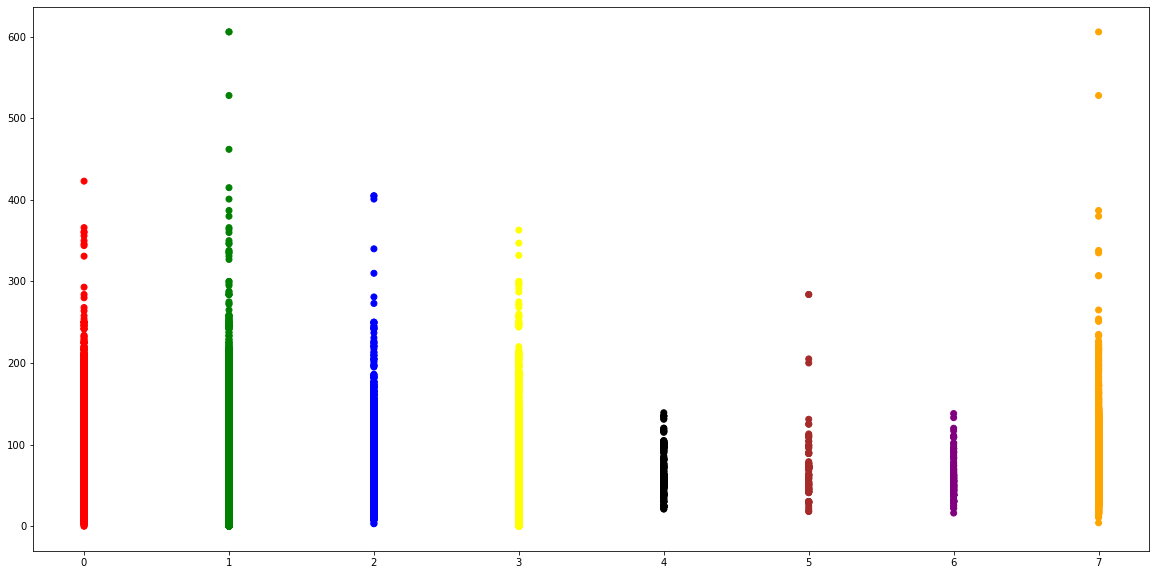

In [30]:
# chars_in_subject
plt.figure(figsize=(20, 10))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'brown', 6:'purple', 7:'orange'}
plt.scatter(train_df['label'], train_df['chars_in_subject'], c=train_df['label'].map(colors))
plt.show()

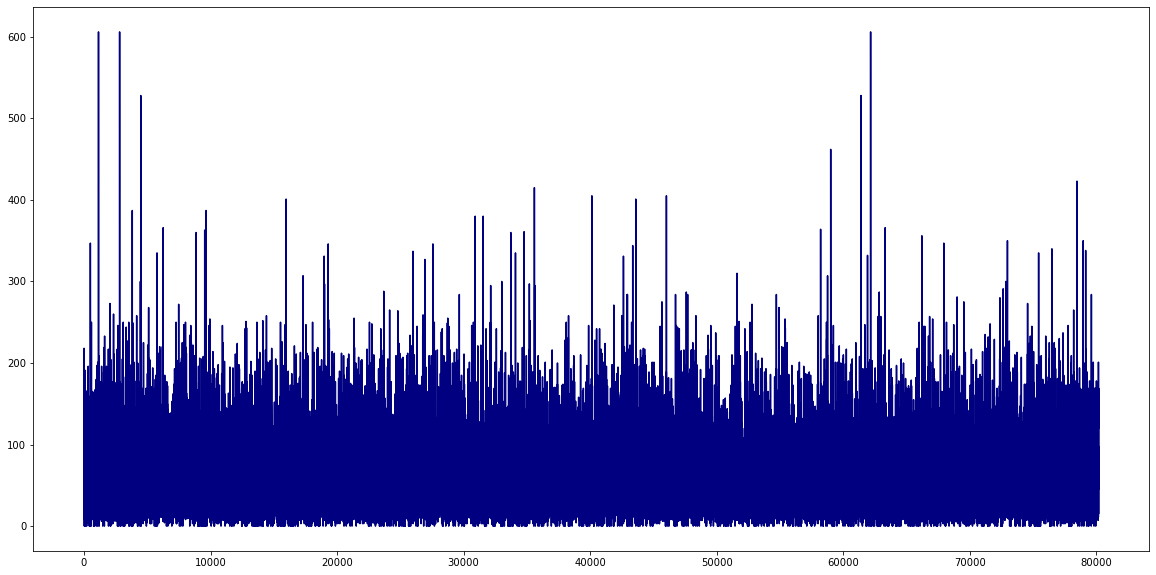

In [31]:
# chars_in_subject
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_df)), train_df['chars_in_subject'], c='navy')
plt.show()

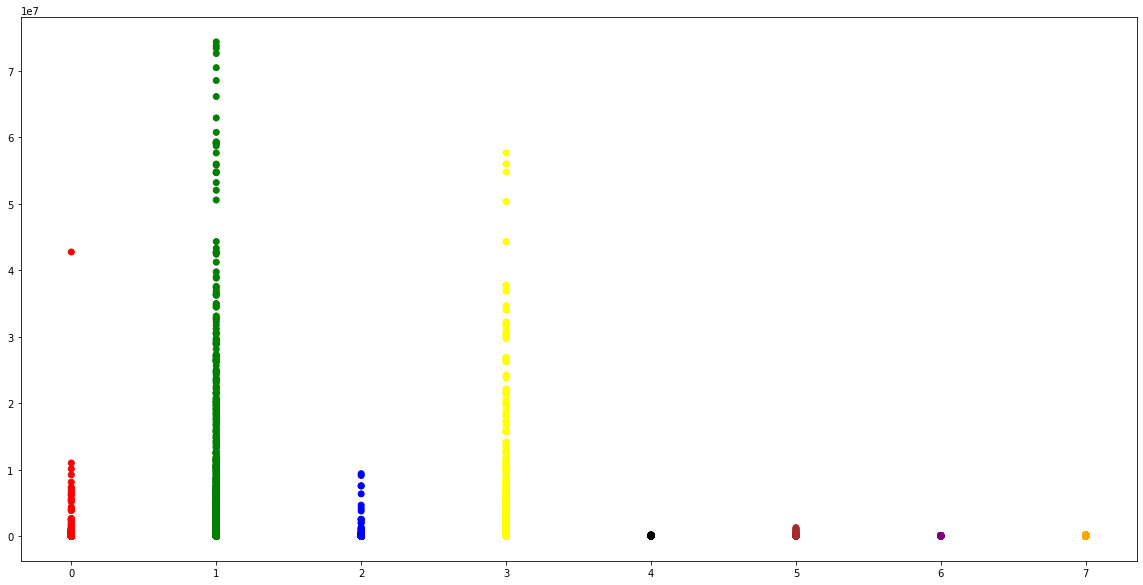

In [32]:
# chars_in_body
plt.figure(figsize=(20, 10))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'brown', 6:'purple', 7:'orange'}
plt.scatter(train_df['label'], train_df['chars_in_body'], c=train_df['label'].map(colors))
plt.show()

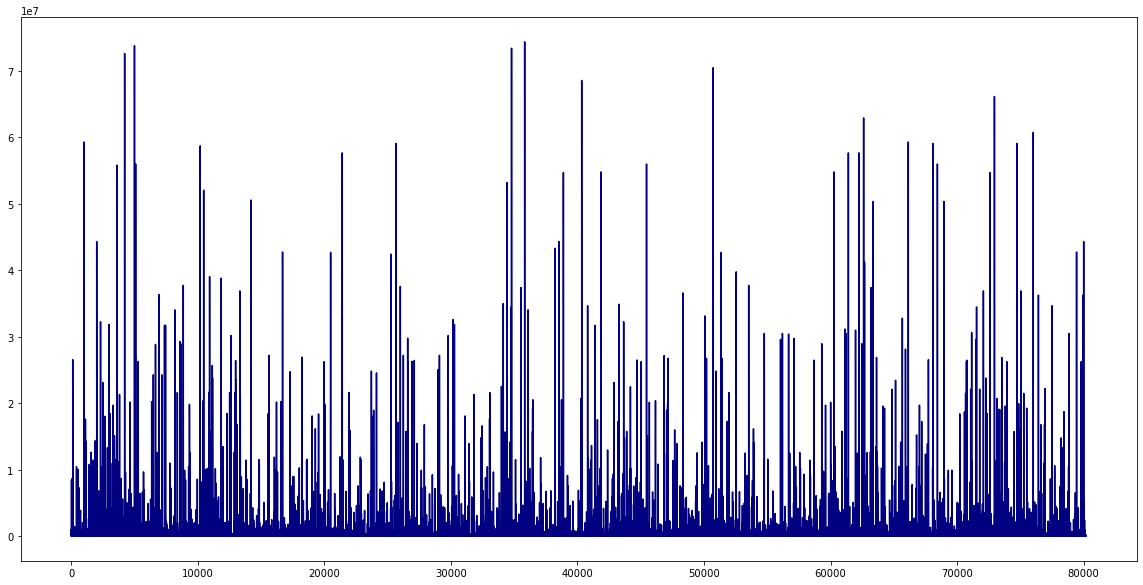

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_df)), train_df['chars_in_body'], c='navy')
plt.show()

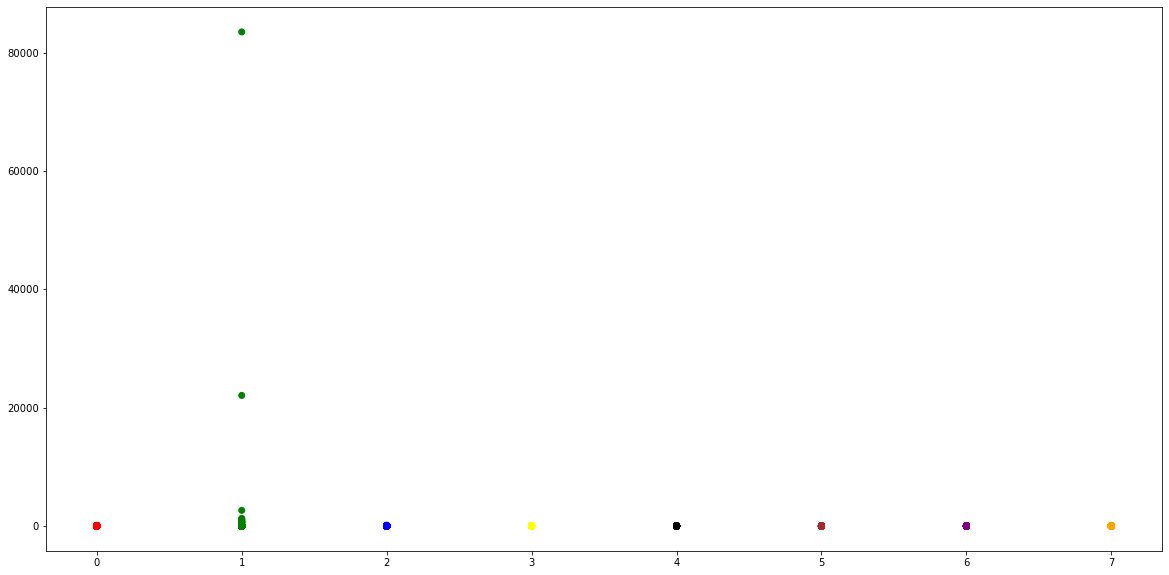

In [34]:
# images
plt.figure(figsize=(20, 10))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'brown', 6:'purple', 7:'orange'}
plt.scatter(train_df['label'], train_df['images'], c=train_df['label'].map(colors))
plt.show()

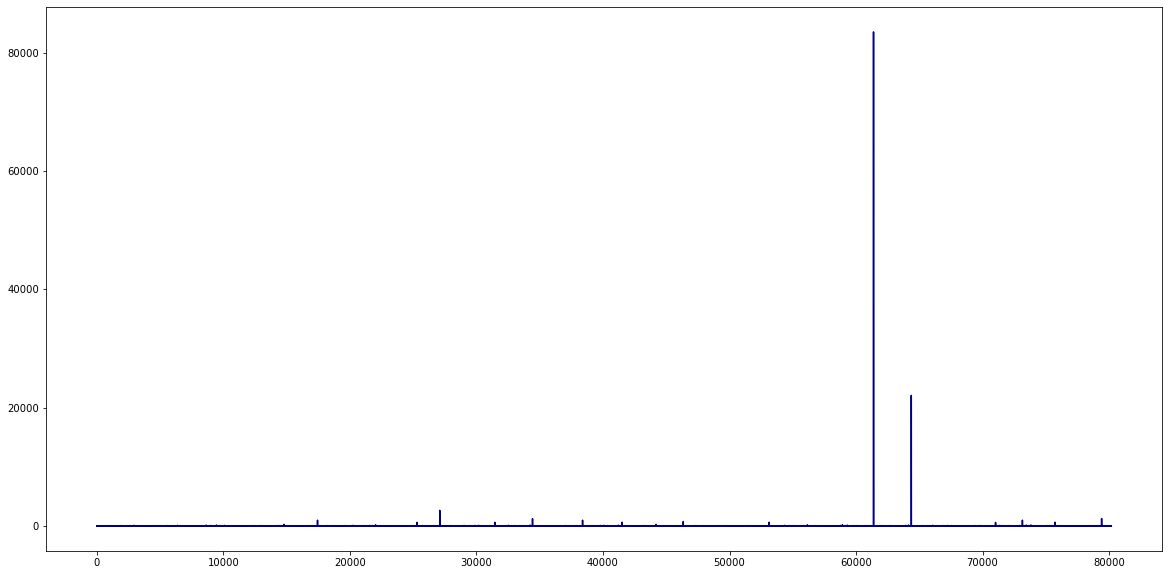

In [35]:
# images
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_df)), train_df['images'], c='navy')
plt.show()

In [36]:
value_count_images = train_df['images'].value_counts()
value_count_images

0       31507
4        8081
1        5717
2        4576
3        3015
        ...  
2658        1
280         1
76          1
126         1
1276        1
Name: images, Length: 115, dtype: int64

In [37]:
value_count_images.loc[value_count_images.index > 1000]

22077    1
83481    1
1251     1
2658     1
1276     1
Name: images, dtype: int64

In [38]:
#drop all the records of images where the value is larger than 1000
L_drop = []
for i in range(len(train_df)):
    if train_df['images'][i] > 1000:
        L_drop.append(i)
L_drop

[27102, 34432, 61381, 64365, 79405]

In [39]:
#drop outliers
train_df.drop(L_drop, axis=0, inplace=True)
train_df.set_index(np.arange(len(train_df)), inplace=True)

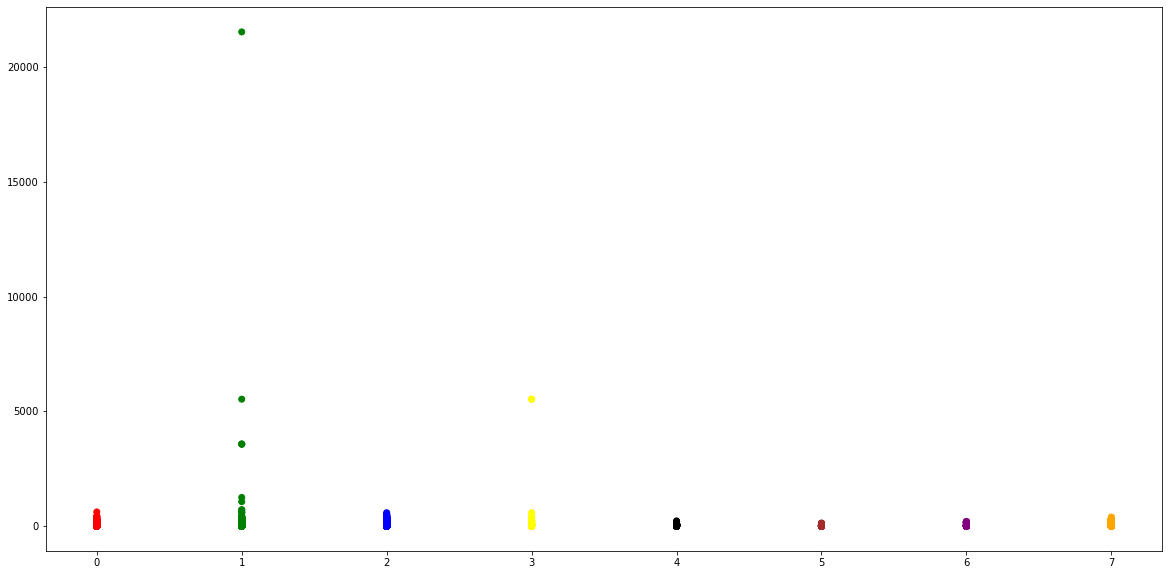

In [40]:
# urls
plt.figure(figsize=(20, 10))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'brown', 6:'purple', 7:'orange'}
plt.scatter(train_df['label'], train_df['urls'], c=train_df['label'].map(colors))
plt.show()

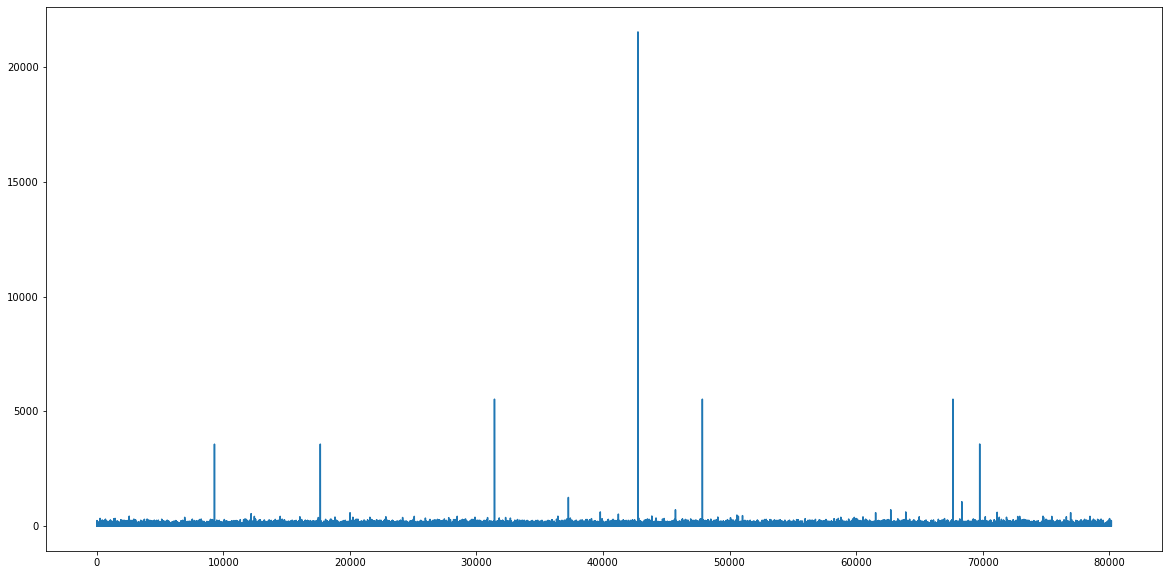

In [41]:
# urls
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_df)), train_df['urls'])
plt.show()

In [42]:
value_count_urls = train_df['urls'].value_counts()
value_count_urls

0        11926
19        4125
1         2721
4         2660
6         2639
         ...  
522          1
21540        1
440          1
354          1
382          1
Name: urls, Length: 357, dtype: int64

In [43]:
value_count_urls.loc[value_count_urls.index > 1000]

5532     3
1064     1
3578     1
3573     1
3571     1
1249     1
21540    1
Name: urls, dtype: int64

In [44]:
#drop all the records of urls where the value is larger than 1000
L_drop = []
for i in range(len(train_df)):
    if train_df['urls'][i] > 1000:
        L_drop.append(i)
L_drop

[9297, 17661, 31424, 37263, 42763, 47851, 67654, 68353, 69767]

In [45]:
train_df.drop(L_drop, axis=0, inplace=True)
train_df.set_index(np.arange(len(train_df)), inplace=True)

# Data analysis test set

In [374]:
# mail type
test_df['mail_type'].value_counts()

multipart/alternative    25081
text/html                 4383
multipart/mixed           2712
text/plain                1179
multipart/related          879
text/html                   25
Multipart/Mixed             11
multipart/signed             6
Text/Html                    4
multipart/report             2
multipart/IDM                1
text/HTML                    1
Multipart/Alternative        1
Name: mail_type, dtype: int64

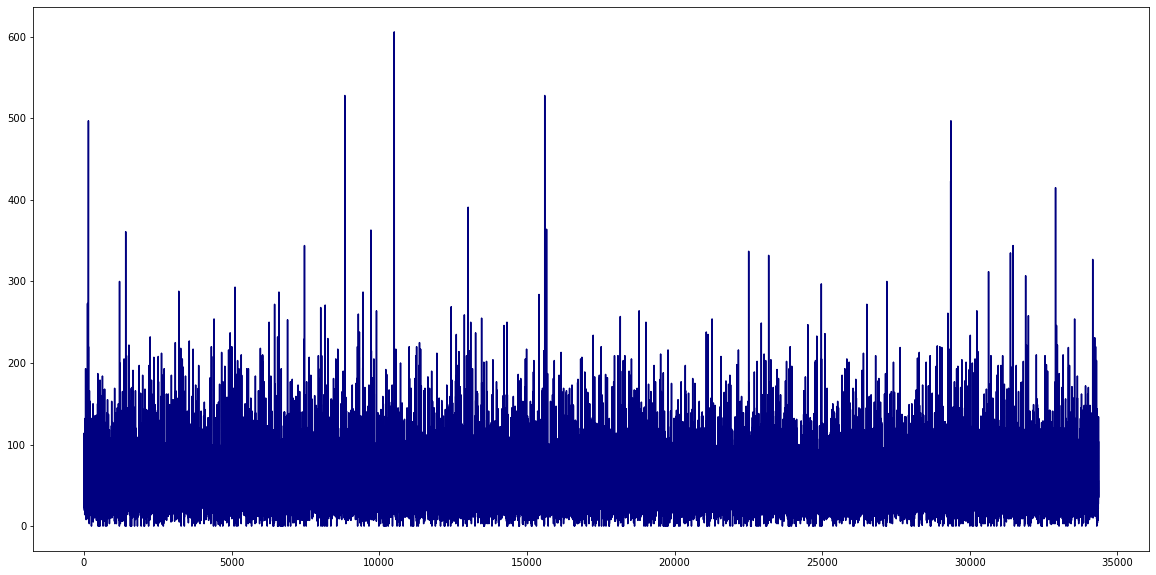

In [375]:
# chars_in_subject
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(test_df)), test_df['chars_in_subject'], c='navy')
plt.show()

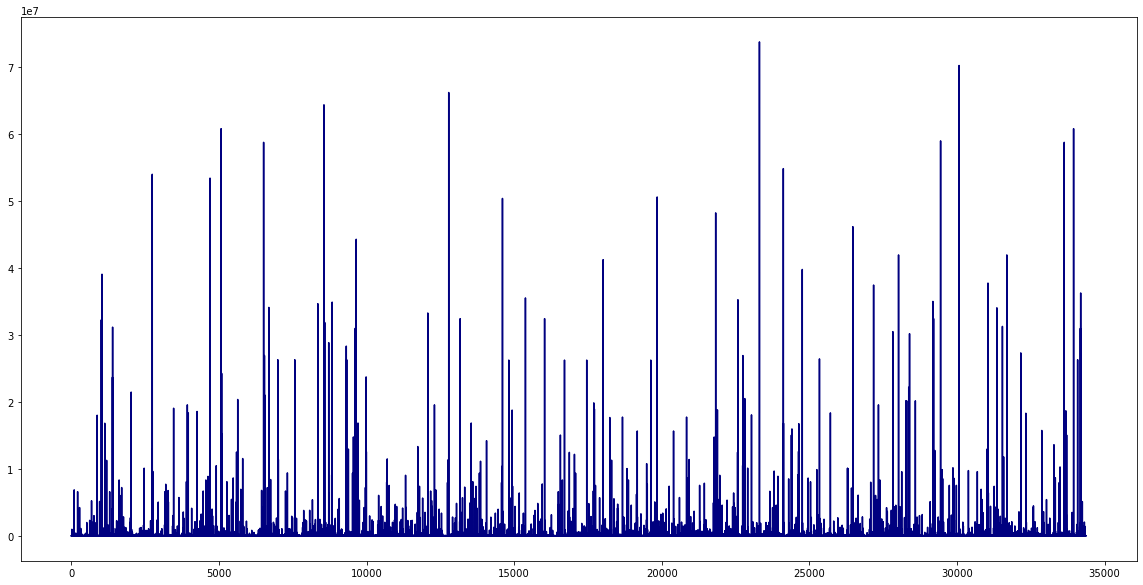

In [376]:
# chars_in_body
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(test_df)), test_df['chars_in_body'], c='navy')
plt.show()

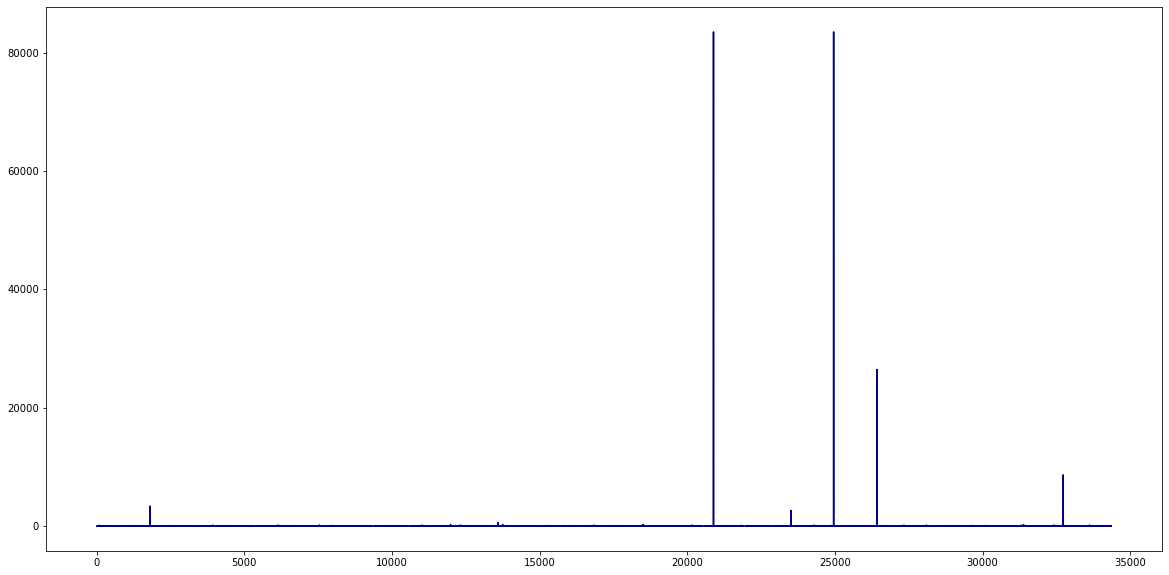

In [377]:
# images
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(test_df)), test_df['images'], c='navy')
plt.show()

In [379]:
value_count_images = test_df['images'].value_counts()
value_count_images

0        13591
4         3378
1         2430
2         1890
3         1321
         ...  
81           1
83481        1
178          1
210          1
621          1
Name: images, Length: 104, dtype: int64

In [380]:
value_count_images.loc[value_count_images.index > 1000]

2658     1
26436    1
3387     1
8650     1
83480    1
83481    1
Name: images, dtype: int64

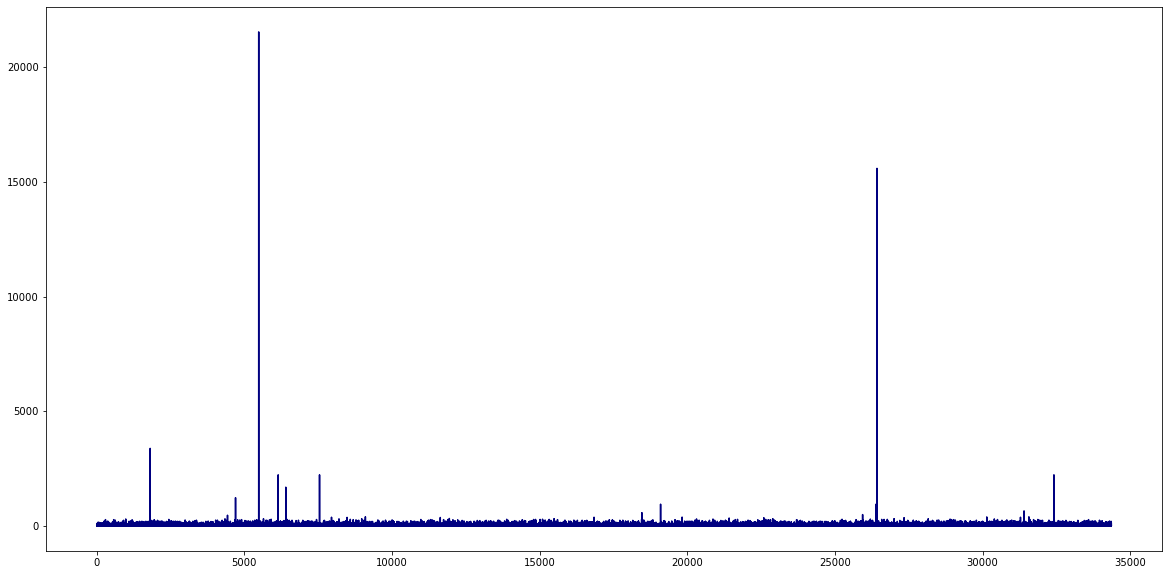

In [386]:
# urls
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(test_df)), test_df['urls'], c='navy')
plt.show()

In [387]:
value_count_urls = test_df['urls'].value_counts()
value_count_urls

0        5081
19       1692
1        1200
6        1120
4        1105
         ... 
276         1
274         1
273         1
15592       1
319         1
Name: urls, Length: 324, dtype: int64

In [388]:
value_count_urls.loc[value_count_urls.index > 1000]

2234     3
1696     1
21540    1
3387     1
1237     1
15592    1
Name: urls, dtype: int64

In [ ]:
#DataFrame.fillna(value=None)

# org and tld

In [46]:
count_org = train_df['org'].value_counts()
count_org

iiitd                 19932
usebackpack            5070
google                 3890
blank                  3451
amazon                 3123
                      ...  
gr31                      1
andromedapublisher        1
hasteroc                  1
app                       1
freedns                   1
Name: org, Length: 1039, dtype: int64

In [47]:
list_org = [str(count_org[i:i+1].keys).split('of ')[1].split(' ')[0] for i in range(len(count_org))]
len(list_org)

1039

In [48]:
n = 180
for i in range(len(count_org)):
    if count_org[i] < n:
        list_org[i] = 'other'

In [49]:
train_new = train_df.copy()

In [50]:
for i in range(len(train_new)):
    if  train_new.loc[i, ('org')] not in list_org:
        train_new.loc[i, ('org')] = 'other'
    else: 
        train_new.loc[i, ('org')] = train_new.loc[i, ('org')]

In [51]:
count_tld = train_df['tld'].value_counts()
count_tld

com                         34617
ac.in                       20031
in                           3783
blank                        3453
org                          3428
                            ...  
exhost4.secureserver.net        1
nitrc.org                       1
cfigroup.com                    1
online                          1
ws                              1
Name: tld, Length: 292, dtype: int64

In [52]:
list_tld = [str(count_tld[i:i+1].keys).split('of ')[1].split(' ')[0] for i in range(len(count_tld))]
len(list_tld)

292

In [53]:
n = 180
for i in range(len(count_tld)):
    if count_tld[i] < n:
        list_tld[i] = 'other'

In [54]:
for i in range(len(train_new)):
    if  train_new.loc[i, ('tld')] not in list_tld:
        train_new.loc[i, ('tld')] = 'other'
    else: 
        train_new.loc[i, ('tld')] = train_new.loc[i, ('tld')]

In [55]:
test_new = test_df.copy()

In [56]:
for i in range(len(test_new)):
    if  test_new.loc[i, ('org')] not in list_org:
        test_new.loc[i, ('org')] = 'other'
    else: 
        test_new.loc[i, ('org')] = test_new.loc[i, ('org')]

for i in range(len(test_new)):
    if  test_new.loc[i, ('tld')] not in list_tld:
        test_new.loc[i, ('tld')] = 'other'
    else: 
        test_new.loc[i, ('tld')] = test_new.loc[i, ('tld')]

In [107]:
#train_new.to_csv('try_train.csv')

# Model

In [57]:
train_new.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'label', 'diff', 'datetime_col', 'weekday', 'day', 'month', 'year',
       'time', 'hour', 'timezone', 'time_1', 'morning', 'noon', 'afternoon',
       'evening', 'night', 'after_night'],
      dtype='object')

In [45]:
#train_new.drop(['date', 'datetime_col', 'time', 'time_1'], axis=1, inplace=True)

In [58]:
test_new.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'diff', 'datetime_col', 'weekday', 'day', 'month', 'year', 'time',
       'hour', 'timezone', 'time_1', 'morning', 'noon', 'afternoon', 'evening',
       'night', 'after_night'],
      dtype='object')

In [47]:
#test_new.drop(['date', 'datetime_col', 'time', 'time_1'], axis=1, inplace=True)

# CatBoostClassifier

In [ ]:
#pip install catboost

In [59]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [60]:
catboost_df = train_new.copy()

In [61]:
catboost_df.drop(['timezone', 'morning', 'noon', 'afternoon', 'evening', 'night', 'after_night'], axis=1, inplace=True)

In [62]:
catboost_df.drop(['date', 'datetime_col', 'time', 'time_1'], axis=1, inplace=True)

In [63]:
catboost_df['org'] = np.where((catboost_df['org'] == 'blank'), 'other', catboost_df['org'])

In [64]:
catboost_df['tld'] = np.where((catboost_df['tld'] == 'blank'), 'other', catboost_df['tld'])

In [65]:
a = pd.isna(catboost_df['mail_type'])
L_mail_type =[]
for i in range(len(a)):
    if a[i] == True:
        L_mail_type.append(i)
print(L_mail_type)

[36, 526, 1084, 1417, 1960, 3140, 4312, 5249, 6028, 6178, 6545, 6637, 7397, 7935, 8378, 9298, 9909, 10507, 10636, 11464, 11525, 11814, 12335, 12689, 12831, 13469, 13714, 13815, 14156, 14574, 14705, 14811, 15213, 15743, 15992, 16042, 16094, 16153, 16331, 17018, 18127, 19655, 19682, 20036, 20802, 20993, 21105, 21419, 21546, 22229, 23851, 23982, 24631, 24775, 25348, 25546, 25989, 26653, 26915, 26961, 27156, 27501, 28004, 28017, 28133, 28337, 29273, 29638, 29759, 30034, 30175, 31120, 31741, 31873, 32952, 33565, 33962, 35113, 35602, 36295, 37475, 37982, 38487, 38535, 38780, 39870, 40021, 40101, 40212, 40239, 40870, 42042, 43170, 43737, 43914, 44015, 44531, 46095, 46308, 47261, 48225, 48409, 48546, 48758, 48980, 49290, 51531, 51710, 52580, 52651, 53120, 54818, 55182, 55419, 55862, 55884, 56043, 56352, 57145, 59721, 61214, 61301, 61449, 61915, 63177, 63266, 63365, 64145, 64257, 64892, 64925, 65053, 65327, 65349, 66280, 66394, 66632, 66881, 67122, 67182, 67238, 67241, 67488, 67615, 68505, 6886

In [66]:
catboost_df.loc[L_mail_type,'mail_type'] = 'multipart/alternative'

In [68]:
catboost_df = catboost_df.astype({"weekday": 'float64', "day": 'float64', "month": 'float64', "year": 'float64', "hour": 'float64'})
catboost_df.dtypes

org                  object
tld                  object
ccs                   int64
bcced                 int64
mail_type            object
images                int64
urls                  int64
salutations           int64
designation           int64
chars_in_subject    float64
chars_in_body         int64
label                 int64
diff                 object
weekday             float64
day                 float64
month               float64
year                float64
hour                float64
dtype: object

In [69]:
catboost_df['diff'].isnull().values.any()

True

In [70]:
catboost_df['chars_in_subject'] = catboost_df['chars_in_subject'].fillna(value=0)

In [71]:
catboost_df['diff'] = catboost_df['diff'].fillna(value='+0000')

In [72]:
catboost_df

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,diff,weekday,day,month,year,hour
0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2,+0100,0.0,6.0,11.0,2017.0,11.0
1,other,other,0,0,multipart/alternative,1,7,0,0,107.0,2961,1,-0000,2.0,14.0,2.0,2018.0,11.0
2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1,+0000,2.0,6.0,7.0,2016.0,19.0
3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1,+0200,4.0,11.0,10.0,2019.0,11.0
4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1,+0000,1.0,7.0,11.0,2017.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80157,github,com,1,0,multipart/alternative,0,8,0,0,91.0,1307,3,-0700,1.0,30.0,6.0,2020.0,5.0
80158,other,other,0,0,text/html,0,2,1,0,73.0,13464,0,+0530,4.0,1.0,5.0,2015.0,11.0
80159,google,com,0,0,multipart/alternative,27,85,0,0,46.0,28485,0,-0700,1.0,26.0,5.0,2020.0,8.0
80160,medium,com,0,0,multipart/alternative,32,239,1,1,169.0,105276,0,+0000,4.0,14.0,12.0,2018.0,9.0


In [73]:
#splitting dataset for train and test
label = catboost_df['label']
train = catboost_df.drop('label', axis=1)
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=2)

In [ ]:
#indicating which features are not categorical
categorical_features_indices = np.where(train.dtypes != np.float)[0]
train_pool = Pool(x_train, y_train, cat_features=categorical_features_indices)

#model
cat = CatBoostClassifier(one_hot_max_size=3000)
cat.fit(train_pool)

#make prediction for evaluation
y_pred_cat = cat.predict(x_test)

In [88]:
# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy ' + str(accuracy_score(y_test, y_pred_cat)))

Accuracy 0.7259915190820654


In [229]:
catboost_prediction = test_new.copy()

In [230]:
catboost_prediction.drop(['date', 'datetime_col', 'time', 'time_1'], axis=1, inplace=True)

In [231]:
catboost_prediction.drop(['timezone', 'morning', 'noon', 'afternoon', 'evening', 'night', 'after_night'], axis=1, inplace=True)

In [232]:
catboost_prediction.drop(['duplicated'], axis=1, inplace=True)

In [233]:
catboost_prediction.dtypes

org                  object
tld                  object
ccs                   int64
bcced                 int64
mail_type            object
images                int64
urls                  int64
salutations           int64
designation           int64
chars_in_subject    float64
chars_in_body         int64
diff                 object
weekday             float64
day                 float64
month               float64
year                float64
hour                float64
dtype: object

In [172]:
catboost_prediction['diff'].isnull().values.any()

False

In [234]:
catboost_prediction['org'] = np.where((catboost_prediction['org'] == 'blank'), 'other', catboost_prediction['org'])
catboost_prediction['tld'] = np.where((catboost_prediction['tld'] == 'blank'), 'other', catboost_prediction['tld'])

In [235]:
catboost_prediction['diff'] = catboost_prediction['diff'].fillna(value='+0000')

In [236]:
catboost_prediction['chars_in_subject'] = catboost_prediction['chars_in_subject'].fillna(value=0)

In [ ]:
catboost_prediction

In [448]:
#catboost_prediction.to_csv('try_test.csv')

In [237]:
a = pd.isna(catboost_prediction['mail_type'])
L_mail_type =[]
for i in range(len(a)):
    if a[i] == True:
        L_mail_type.append(i)
print(L_mail_type)

[45, 103, 369, 673, 689, 918, 2790, 2842, 3452, 3678, 3703, 3767, 3867, 4604, 4797, 5579, 6215, 6745, 6750, 7994, 9558, 10472, 11271, 11506, 11517, 12620, 12693, 13111, 15495, 15919, 16272, 16612, 17298, 17550, 17589, 17848, 17870, 18275, 18432, 18475, 19377, 19525, 19587, 20545, 20586, 21460, 21740, 21877, 21898, 21995, 22354, 22548, 22882, 23755, 24149, 25466, 25843, 26425, 26702, 27127, 27685, 29736, 30170, 30172, 30225, 30479, 30841, 30959, 31391, 31908, 31957, 32032, 32051, 32192, 32640, 32878, 33186, 34109, 34239, 34251]


In [238]:
catboost_prediction.loc[L_mail_type,'mail_type'] = 'multipart/alternative'

In [616]:
catboost_prediction = catboost_prediction.fillna(value=0)

In [254]:
pred_y = cat.predict(catboost_prediction)

In [255]:
## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("catboost_sample_14.csv", index=True, index_label='Id')